# 第三章 k近邻法

$k$近邻法($k$-NN)是一种基本分类和回归方法。


算法原理：

算法3.1($k$近邻法)


输入：训练集
$$T=\{(x_1,y_1),(x_2,y_2),...,(x_N,y_N)\}$$
其中,$x_i\in \mathcal {X} \subseteq \mathcal{R^n}$为实例的特征向量,$y_i \in \mathcal {Y}=\{c_1,c_2,...,c_K\}$为实例的类别，$i=1,2,...,N$;实例特征向量$x$;

输出：实例$x$所属的类$y$.  
(1)根据给定的距离度量，在训练集$T$中找出与$x$最邻近的$k$个点,涵盖这$k$个点的$x$的邻域基座$N_k(x)$;
(2)在$N_k(x)$中根据分类决策规则(如多数表决）决定$x$的类别$y$:
$$y=\arg \max_{cj} \sum_{x_i \in N_k(x)} I(y_i=c_i),i=1,2,...,N;j=1,2,...,K$$

上式中，$I$为指数函数，即当$y_i=c_i$时$I$为1,否则$I$为0.

注：当$k=1$时，$k$近邻法又称为最近邻算法，它是$k$近邻算法的特殊情况。

### 距离度量

设特征空间$x$是$n$维实数向量空间$\mathcal{R_n}$,$x_i,y_i \in \mathcal {X}$, $x_i=\left(x_{i}^{(1)},x_i^{(2)},\cdots,x_{i}^{(n)}\right)^{\mathrm{T}}$,$x_j=\left(x_j^{(1)},x_j^{(2)},\cdots,x_j^{(n)}\right)^{\mathrm{T}}$

$x_i$,$x_j$的$L_p$距离定义为：

$$L_p \left(x_i,x_j\right)=\left(\sum_{l=1}^{n} \left|x_i^{(l)}-x_j^{(l)}\right|^p \right)^{\frac{1}{p}}$$

- $p=2$ 欧式距离
$$L_2 \left(x_i,x_j\right)=\left(\sum_{l=1}^{n} \left|x_i^{(l)}-x_j^{(l)}\right|^2 \right)^{\frac{1}{2}}$$

- $p=1$ 曼哈顿距离
$$L_1 \left(x_i,x_j\right)=\sum_{l=1}^{n} \left|x_i^{(l)}-x_j^{(l)}\right|$$

- $p=\infty$ 指各个坐标距离的最大值
$$L_{\infty} \left(x_i,x_j\right)=\max_l\left|x_i^{(l)}-x_j^{(l)}\right|$$



## 距离度量 python实现

In [2]:
import math
from itertools import combinations

In [3]:
def Distance(x,y,p=2):
    if len(x)==len(y) and len(x)>1:
        sum=0
        for i in range(len(x)):
            sum+=math.pow(abs(x[i]-y[i]),p)
        return math.pow(sum,1/p)
    else:
        return 0

## 书中例3.1

In [4]:
#二维空间的三个点坐标
x1=[1,1]
x2=[5,1]
x3=[4,4]

In [6]:
for i in range(1,5):
    r={'p={} x1=[1,1],x2={}'.format(i,x2):Distance(x1,x2,p=i)}
    print(min(zip(r.keys(),r.values())))
    
for i in range(1,5):
    r={'p={} x1=[1,1],x3={}'.format(i,c):Distance(x1,c,p=i)for c in [x3]}
    print(min(zip(r.keys(),r.values())))

('p=1 x1=[1,1],x2=[5, 1]', 4.0)
('p=2 x1=[1,1],x2=[5, 1]', 4.0)
('p=3 x1=[1,1],x2=[5, 1]', 3.9999999999999996)
('p=4 x1=[1,1],x2=[5, 1]', 4.0)
('p=1 x1=[1,1],x3=[4, 4]', 6.0)
('p=2 x1=[1,1],x3=[4, 4]', 4.242640687119285)
('p=3 x1=[1,1],x3=[4, 4]', 3.7797631496846193)
('p=4 x1=[1,1],x3=[4, 4]', 3.5676213450081633)


### 对iris花瓣数据分类 python实现
遍历所有数据点，找出$n$个距离最近的点的分类情况（少数服从多数原则）

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

from collections import Counter

### 1.加载数据

In [8]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['label'] = iris.target
# 构建数据列名
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']

In [10]:
#展示部分数据(展示10条记录)，截取部分记录 df[start:end]
df[0:10]

,sepal length,sepal width,petal length,petal width,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


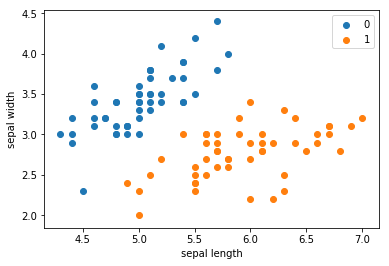

In [29]:
# 以花萼长度和宽度构架二维数据并展示
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label='0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()


### 2.定义KNN

In [14]:
class KNN:
    def __init__(self, X_train, y_train, n_neighbors=3, p=2):
        """
        parameter: n_neighbors 临近点个数
        parameter: p 距离度量
        """
        self.n = n_neighbors
        self.p = p
        self.X_train = X_train
        self.y_train = y_train
    
    def predict(self, X):
        # 取出n个点
        knn_list = []
        for i in range(self.n):
            dist = np.linalg.norm(X - self.X_train[i], ord=self.p)
            knn_list.append((dist, self.y_train[i]))
            
        for i in range(self.n, len(self.X_train)):
            max_index = knn_list.index(max(knn_list, key=lambda x: x[0]))
            dist = np.linalg.norm(X - self.X_train[i], ord=self.p)
            if knn_list[max_index][0] > dist:
                knn_list[max_index] = (dist, self.y_train[i])
                
        # 统计
        knn = [k[-1] for k in knn_list]
        count_pairs = Counter(knn)
        max_count = sorted(count_pairs, key=lambda x:x)[-1]
        return max_count
    
    def score(self, X_test, y_test):
        # 投票得分
        right_count = 0
        n = 10
        for X, y in zip(X_test, y_test):
            label = self.predict(X)
            if label == y:
                right_count += 1
        return right_count / len(X_test)

### 3.构建训练数据和测试数据

In [15]:
data = np.array(df.iloc[:100, [0, 1, -1]])
X, y = data[:,:-1], data[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### 4.训练

In [16]:
clf=KNN(X_train,y_train)

### 5.测试

In [17]:
# 给定测试数据，计算其分类正确性
clf.score(X_test,y_test)

1.0

### 6.预测

测试点类别: 1.0


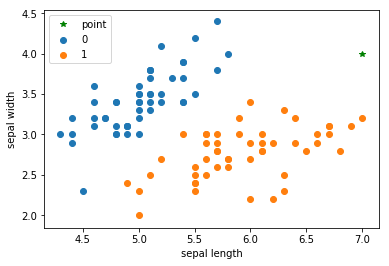

In [27]:
# 构建测试点 预测其类别
point = [7.0, 4.0]
print('测试点类别: {}'.format(clf.predict(point)))

plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label='0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label='1')
plt.plot(point[0], point[1], 'g*', label='point')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()